In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree, export_text
import matplotlib.pyplot as plt

### Dataset for training

In [2]:

# Load the dataset
training = pd.read_csv('/home/dhpcap/ML_module/project/kagg/Training.csv')

# Check for missing values and handle them
if training.isna().sum().sum() > 0:
    print("Missing values detected. Filling with zeros.")
    training.fillna(0, inplace=True)  # Replace NaN with 0 or use another strategy

# Label encoding for the target variable
label_encoder = LabelEncoder()
X = training.drop(['prognosis'], axis=1)
y_e = training['prognosis']
y = label_encoder.fit_transform(y_e)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Predict for a single instance
df2 = pd.DataFrame(columns=X_test.columns)
df2 = pd.concat([df2, X_test.iloc[[2]]], axis=0, ignore_index=True)  # Use test set's third row for prediction

# Ensure no missing values in df2
df2.fillna(0, inplace=True)

m = rf.predict(df2)
dis = label_encoder.inverse_transform(m)
print('You should do test of:', dis)
print('\n\n\n')

Missing values detected. Filling with zeros.
Accuracy: 1.0
You should do test of: ['Hyperthyroidism']






/tmp/ipykernel_45955/4002473410.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df2 = pd.concat([df2, X_test.iloc[[2]]], axis=0, ignore_index=True)  # Use test set's third row for prediction


## Dataset with added noise & increased datasize

In [7]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import time


In [10]:

# Start measuring total execution time
start_total_time = time.time()

# Load the dataset
training = pd.read_csv('/home/dhpcap/ML_module/project/kagg/Training.csv')

# Create a function to augment the data
def augment_data(df, num_copies):
    augmented_data = df.copy()
    
    for _ in range(num_copies):
        # Randomly flip some symptom values to create variations
        for column in df.columns[:-1]:  # Exclude 'prognosis'
            if df[column].dtype == 'int64':  # Assuming symptoms are binary (0 or 1)
                # Flip values with a probability of 0.1 (10%)
                flip_mask = np.random.rand(len(augmented_data)) < 0.1
                augmented_data.loc[flip_mask, column] = 1 - augmented_data.loc[flip_mask, column]
    
    return augmented_data

# Determine how many copies to create
original_size = len(training)
target_size = 10000
num_copies = target_size // original_size  # Calculate how many times to duplicate

# Create augmented data
augmented_data = augment_data(training, num_copies)

# Combine original and augmented data
expanded_df = pd.concat([training] + [augmented_data] * num_copies, ignore_index=True)

# If the expanded_df is larger than 100,000, you can slice it
if len(expanded_df) > target_size:
    expanded_df = expanded_df.sample(n=target_size, random_state=42).reset_index(drop=True)

# Save the expanded dataset to a new CSV file without the index
expanded_df.to_csv('/home/dhpcap/ML_module/project/kagg/Expanded_Training.csv', index=False)

# Check for missing values and handle them
if expanded_df.isna().sum().sum() > 0:
    print("Missing values detected. Filling with zeros.")
    expanded_df.fillna(0, inplace=True)  # Replace NaN with 0 or use another strategy

# Label encoding for the target variable
label_encoder = LabelEncoder()
X = expanded_df.drop(['prognosis'], axis=1)
y_e = expanded_df['prognosis']
y = label_encoder.fit_transform(y_e)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Measure training time
start_train_time = time.time()
# Train a Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
end_train_time = time.time() - start_train_time

# Evaluate the model
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Generate the classification report
class_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

# Measure test time
start_time = time.time()
y_test_pred = rf.predict(X_test)
test_time = time.time() - start_time

# End measuring total execution time
end_total_time = time.time() - start_total_time

# Print results
print("\n--- Model Evaluation Results ---\n")
print(f"Accuracy: {accuracy:.4f}\n")
print(f"Training Time: {end_train_time:.4f} seconds\n")
print(f"Testing Time: {test_time:.4f} seconds\n")
print(f"Total Execution Time: {end_total_time:.4f} seconds\n")
print("\nClassification Report:\n\n", class_report)

# Predict for a single instance
df2 = pd.DataFrame(columns=X_test.columns)
df2 = pd.concat([df2, X_test.iloc[[7]]], axis=0, ignore_index=True)  # Use test set's eighth row for prediction

# Ensure no missing values in df2
df2.fillna(0, inplace=True)

# Make a prediction using the trained model
m = rf.predict(df2)

# Inverse transform the predicted labels
dis = label_encoder.inverse_transform(m)


print('You should do test of:', dis)
print('\n\n')

Missing values detected. Filling with zeros.

--- Model Evaluation Results ---

Accuracy: 0.9095

Training Time: 1.5783 seconds

Testing Time: 0.0660 seconds

Total Execution Time: 2.3058 seconds


Classification Report:

                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       0.84      0.84      0.84        44
                                   AIDS       0.92      0.73      0.81        62
                                   Acne       0.93      0.94      0.93        53
                    Alcoholic hepatitis       0.84      0.94      0.89        51
                                Allergy       0.92      0.80      0.86        41
                              Arthritis       0.94      0.94      0.94        50
                       Bronchial Asthma       0.89      0.93      0.91        44
                   Cervical spondylosis       0.95      0.89      0.92        45
                            Chicken pox       0

/tmp/ipykernel_45955/3141807874.py:85: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df2 = pd.concat([df2, X_test.iloc[[7]]], axis=0, ignore_index=True)  # Use test set's eighth row for prediction


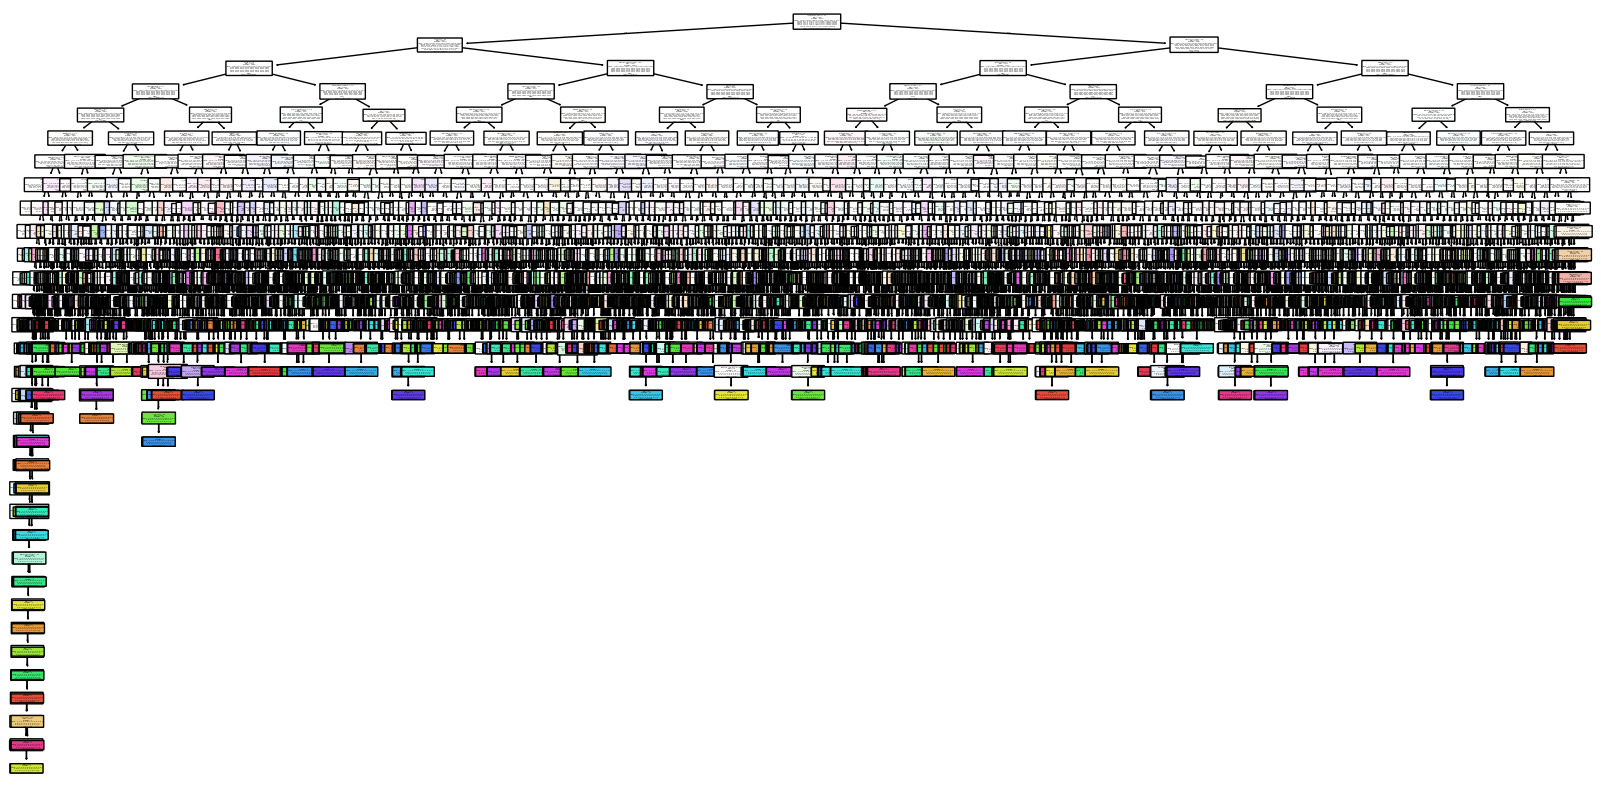

In [6]:
train_tree = rf.estimators_[0]
plt.figure(figsize=(20, 10))
plot_tree(
    train_tree,
    feature_names=X.columns,          # Feature names from the DataFrame
    class_names=label_encoder.classes_,  # Class names from the label encoder
    filled=True,
    rounded=True
)
plt.show()